# Задание 0 (1 балл)


Данные, которые нужно использовать для выполнения задания, возьмите [здесь](https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data).

Данные расположены в двух таблицах: **penguins_iter** и **penguins_size**. Для этой лабораторной работы вам понадобится только таблица **penguins_size**.

**penguins_size** содержит следующую информацию:
* `species`: вид, к которому относится пингвин
* `culmen_length_mm`: длина клюва
* `culmen_depth_mm`: глубина клюва
* `flipper_length_mm`: длина ласт
* `body_mass_g`: масса тела
* `island`: название острова, на котором пингвин обитает
* `sex`: пол пингвина



1. Загрузите файл с данными к себе на Гугл диск и подключите его в Google Colab через `mount.drive`.
2. Выведите общую статистику по всем числовым и нечисловым столбцам с помощью метода `describe()`.
3. Узнайте размеры датасета с помощью свойство `shape`.
4. Выведите 4 первые строки датасета.

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
penguins_size_data = pd.read_csv("/content/drive/MyDrive/penguins_size.csv")

Mounted at /content/drive


In [ ]:

penguins_size_data.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [ ]:
penguins_size_data.shape

(344, 7)

In [ ]:
penguins_size_data.head(4)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN


# Задание 1 (1 балл)

1. Узнайте, сколько видов пингвинов представлено в таблице.
2. Посчитайте долю пингвинов каждого вида.
3. Выведите количество пингвинов, обитающих на каждом из островов.

In [ ]:
print(f"Всего видов пингвинов: {penguins_size_data.species.nunique()}")

NameError: ignored

In [ ]:
penguins_size_data['species'].value_counts( normalize = True)

In [ ]:
penguins_size_data['island'].value_counts()

# Задание 2 (1 балл)


1. Найдите id пингвина с самым длинным клювом и с самым коротким. Выведите всю информацию о каждом из этих пингвинов в виде одной таблицы.
2. Посчитайте, насколько самый длинный клюв длиннее самого короткого.

In [ ]:
penguins_size_data.iloc[[penguins_size_data['culmen_length_mm'].idxmax(), penguins_size_data['culmen_length_mm'].idxmin()]]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,MALE
142,Adelie,Dream,32.1,15.5,188.0,3050.0,FEMALE


In [ ]:
print(penguins_size_data.culmen_length_mm.max()-penguins_size_data.culmen_length_mm.min())

27.5


# Задание 3 (1 балл)

1. Постройте корреляционную матрицу для значений столбцов `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g`. 
2. Результат покажите на тепловой карте (heatmap). Требуется построить график, а не раскрасить получившуюся в первом пункте таблицу.

                   culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm           1.000000        -0.235053           0.656181   
culmen_depth_mm           -0.235053         1.000000          -0.583851   
flipper_length_mm          0.656181        -0.583851           1.000000   
body_mass_g                0.595110        -0.471916           0.871202   

                   body_mass_g  
culmen_length_mm      0.595110  
culmen_depth_mm      -0.471916  
flipper_length_mm     0.871202  
body_mass_g           1.000000  


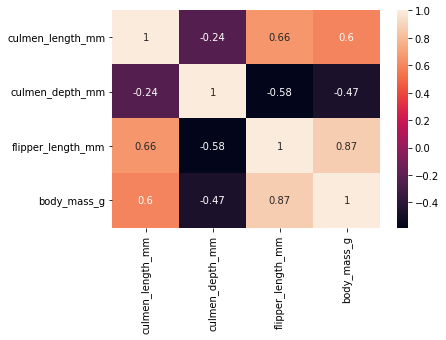

In [ ]:
import seaborn as sn

col = ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']

# Correlation Matrix formation
corr_matrix = penguins_size_data.loc[:,col].corr()
print(corr_matrix)

sn.heatmap(corr_matrix, annot=True)



# Задание 4 (2 балла)

1. О пингвинах какого вида в таблице больше всего недостающих данных? (Строк с `NaN`)
2. Какой информации о пингвинах чаще всего не хватает?

In [ ]:
penguins_size_data.isnull().groupby([penguins_size_data.species]).sum().sum(axis=1).idxmax()

'Adelie'

In [ ]:
penguins_size_data.isnull().sum().idxmax()

'sex'

# Задание 6 (2 балла)

1. Считая, что длина плавника пингвина составляет треть его роста, рассчитайте индекс массы тела каждого пингвина. Определите самый крупный вид.
2. В каком количестве популяция этого вида представлена на каждом из островов? Результат покажите на круговой диаграмме.

In [ ]:
penguins_size_data = penguins_size_data.assign(hight = penguins_size_data.flipper_length_mm * 3)
penguins_size_data = penguins_size_data.assign(IMT = (penguins_size_data.body_mass_g/1000)/((penguins_size_data.hight/1000)**2))
penguins_size_data.groupby(['species'])['IMT'].mean().idxmax()

'Gentoo'

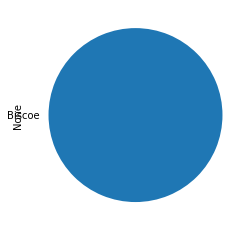

In [ ]:
penguins_size_data[penguins_size_data['species'] == penguins_size_data.groupby(['species'])['IMT'].mean().idxmax()].groupby(['island']).size().plot.pie()